In [35]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
data= pd.read_csv("healthcare-dataset-stroke-data.csv")
data.set_index('id', inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [37]:
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1, 'Other': 1})
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})
data['Residence_type'] = data['Residence_type'].map({'Urban': 1, 'Rural': 0})
data['smoking_status'] = data['smoking_status'].map({'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2,'smokes': 3})
data['work_type'] = data['work_type'].map({'children': 0, 'Never_worked': 1, 'Self-employed': 2, 'Govt_job': 3, 'Private': 4})

In [38]:
data = data.apply(lambda x: x.astype("float64"))
data.dtypes

gender               float64
age                  float64
hypertension         float64
heart_disease        float64
ever_married         float64
work_type            float64
Residence_type       float64
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
stroke               float64
dtype: object

In [39]:
mean_bmi = data['bmi'].mean()
data['bmi'] = data['bmi'].fillna(mean_bmi)

In [40]:
# Menghitung jumlah total nilai NaN tiap kolom dalam DataFrame
jumlah_nan_per_kolom = data.isnull().sum()
jumlah_nan_total = jumlah_nan_per_kolom.sum()
print(f"Jumlah total nilai NaN dalam DataFrame: {jumlah_nan_total}")
print(jumlah_nan_per_kolom)

Jumlah total nilai NaN dalam DataFrame: 0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [41]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1.0,67.0,0.0,1.0,1.0,4.0,1.0,228.69,36.600000,2.0,1.0
51676,0.0,61.0,0.0,0.0,1.0,2.0,0.0,202.21,28.893237,1.0,1.0
31112,1.0,80.0,0.0,1.0,1.0,4.0,0.0,105.92,32.500000,1.0,1.0
60182,0.0,49.0,0.0,0.0,1.0,4.0,1.0,171.23,34.400000,3.0,1.0
1665,0.0,79.0,1.0,0.0,1.0,2.0,0.0,174.12,24.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18234,0.0,80.0,1.0,0.0,1.0,4.0,1.0,83.75,28.893237,1.0,0.0
44873,0.0,81.0,0.0,0.0,1.0,2.0,1.0,125.20,40.000000,1.0,0.0
19723,0.0,35.0,0.0,0.0,1.0,2.0,0.0,82.99,30.600000,1.0,0.0


1) id: unique identifier
2) gender: Gender of the individual (0 for female, 1 for male)
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: Indicator for marriage status (0 for no, 1 for yes).
7) work_type: 'children': 0, 'Never_worked': 1, 'Self-employed': 2, 'Govt_job': 3, 'Private': 4
8) Residence_type:  Type of residence (0 for rural, 1 for urban)
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: ('Unknown': 0, 'never smoked': 1, 'formerly smoked': 2,'smokes': 3)
12) stroke: 1 if the patient had a stroke or 0 if not

In [42]:
# Pisahkan fitur (X) dan label (y)
X = data.drop('stroke', axis=1)
y = data['stroke']

# Bagi data menjadi set data latih dan set data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Buat model Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

In [44]:
# Latih model dengan data latih
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

In [46]:
# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model decision tree: {accuracy * 100:.2f}%')

Akurasi model decision tree: 91.10%


In [47]:
# Laporan klasifikasi dan matriks kebingungan
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       960
         1.0       0.25      0.23      0.24        62

    accuracy                           0.91      1022
   macro avg       0.60      0.59      0.59      1022
weighted avg       0.91      0.91      0.91      1022



In [48]:
print("\nMatriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))


Matriks Kebingungan:
[[917  43]
 [ 48  14]]


In [49]:
# Validasi model dengan cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Skor cross-validation (rata-rata dari 5 lipatan): {cv_scores.mean() * 100:.2f}%')

Skor cross-validation (rata-rata dari 5 lipatan): 90.94%


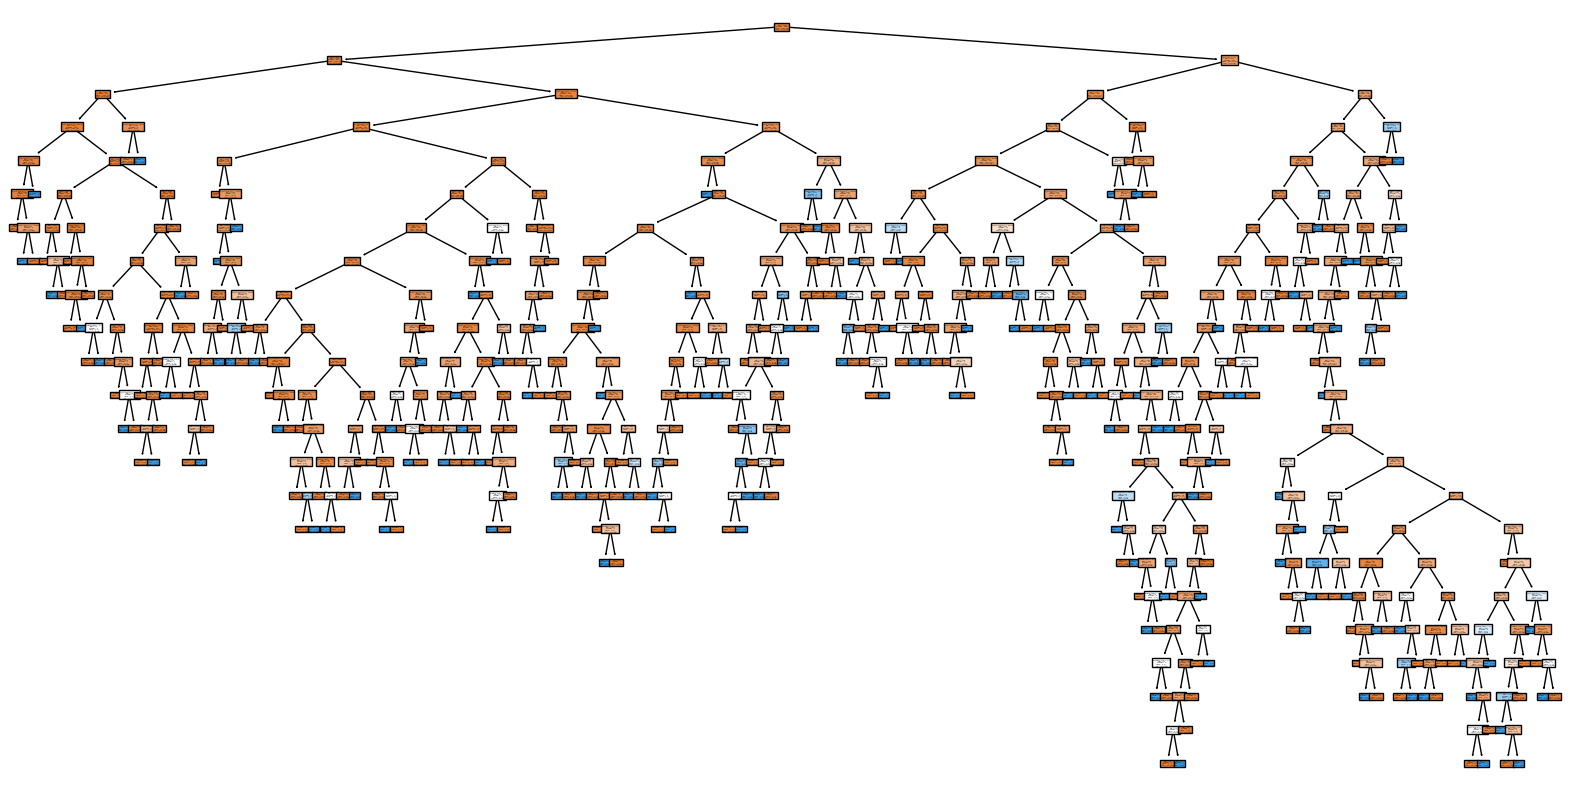

In [50]:
# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.show()